# Predict TripAdvisor Rating
## Проект 3. О вкусной и здоровой пище
### Итоговая работа Анны Лубневской
### В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [393]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [394]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [395]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [396]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [397]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [398]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [399]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [400]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [401]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [402]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [403]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [405]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
14329,id_3585,Paris,"['American', 'Vegetarian Friendly']",3586.0,$$ - $$$,405.0,"[['service is horrible', 'Simply ordinary: The...",/Restaurant_Review-g187147-d718074-Reviews-Joe...,d718074,1,3.5
26042,id_2361,Berlin,NaN,2363.0,NaN,9.0,"[['Traditional German cafe', 'Excellent coffee...",/Restaurant_Review-g187323-d8874214-Reviews-Ku...,d8874214,1,4.5
11039,id_9989,London,"['Brazilian', 'South American']",9998.0,$$ - $$$,31.0,"[['Great restaurant', 'Generous portions, grea...",/Restaurant_Review-g186338-d8552830-Reviews-Sa...,d8552830,1,4.0
5134,id_5134,Helsinki,['Fast Food'],1111.0,$,3.0,[['My One Experience Was Poor - Yours May Be.....,/Restaurant_Review-g189934-d12569147-Reviews-H...,d12569147,0,0.0
13509,id_4323,London,"['Italian', 'European', 'Mediterranean', 'Vege...",4330.0,$$ - $$$,127.0,"[['Fantastic Italian', 'Always great cooking']...",/Restaurant_Review-g186338-d734236-Reviews-La_...,d734236,1,4.5


In [406]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   


## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [407]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [408]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [409]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [410]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

In [411]:
data.sample(3)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
44028,id_4005,Madrid,['Italian'],4007.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g187514-d10229509-Reviews-L...,d10229509,1,5.0,1
48946,id_3242,Madrid,NaN,3244.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,1,5.0,0
43086,id_3173,Madrid,['Spanish'],3175.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187514-d12216054-Reviews-M...,d12216054,1,5.0,0


Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [412]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [413]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
39562,id_2025,"['Bar', 'Pub']",2026.0,NaN,8.0,"[['Nice and funny!', 'Cheap and cheerful'], ['...",/Restaurant_Review-g274887-d4580195-Reviews-PO...,d4580195,1,4.0,...,0,0,0,0,0,0,0,0,0,0
43786,id_1820,"['Mexican', 'Indian', 'Vegetarian Friendly']",1823.0,$$ - $$$,86.0,"[['Lovely margaritas!', 'Ok for a pit stop.'],...",/Restaurant_Review-g274707-d10539464-Reviews-O...,d10539464,1,3.5,...,0,0,0,1,0,0,0,0,0,0
9015,id_9015,['Spanish'],5176.0,NaN,10.0,"[['Yummy meal', 'Food was ok'], ['07/18/2016',...",/Restaurant_Review-g187514-d6180237-Reviews-Ba...,d6180237,0,0.0,...,0,0,0,0,0,0,0,0,0,0
46150,id_819,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",820.0,$$ - $$$,626.0,"[['Very good restaurant', 'Best pizza in Roma'...",/Restaurant_Review-g187791-d3454871-Reviews-Ma...,d3454871,1,4.0,...,0,0,0,0,1,0,0,0,0,0
35304,id_1931,NaN,1935.0,NaN,11.0,"[['Fish', 'Nice Food & Drink At Reasonable Pri...",/Restaurant_Review-g187331-d12491796-Reviews-K...,d12491796,1,3.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

## Price Range

In [415]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [416]:
# обработка 'Price Range'

# создадим словарь для конвертации значений
price_range_dict = dict(zip(['$$ - $$$', '$', '$$$$'], [500, 5, 5000]))

data['Price Range'] = data['Price Range'].replace(to_replace=price_range_dict)

In [417]:
data['Price Range'].value_counts()

500.0     23041
5.0        7816
5000.0     1782
Name: Price Range, dtype: int64

In [418]:
data.columns[:11]

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Number_of_Reviews_isNAN'],
      dtype='object')

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

## Cuisine Style

In [419]:
import re
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: re.findall(r"[^'][\w\s]+[^']", str(x)))

In [420]:
%%time
data = pd.get_dummies(data.explode('Cuisine Style'), columns=['Cuisine Style'], prefix='CS', dummy_na=True)

CPU times: user 620 ms, sys: 7.84 ms, total: 628 ms
Wall time: 626 ms


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.


### Посмотрим распределение признака

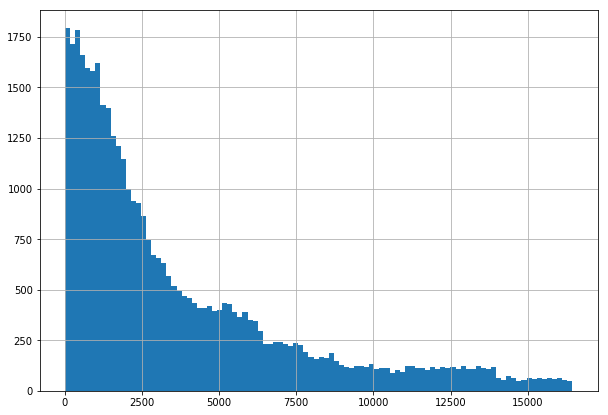

In [421]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

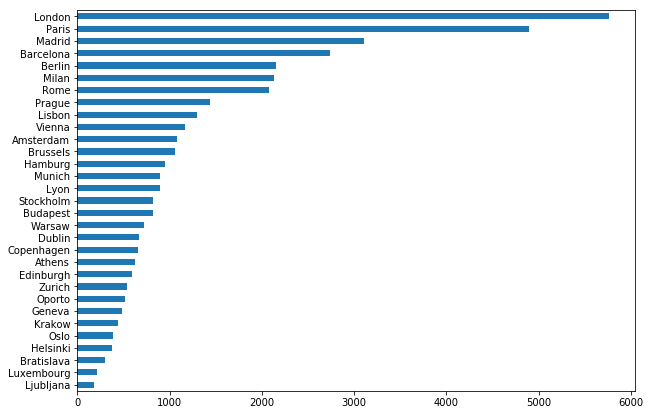

In [422]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

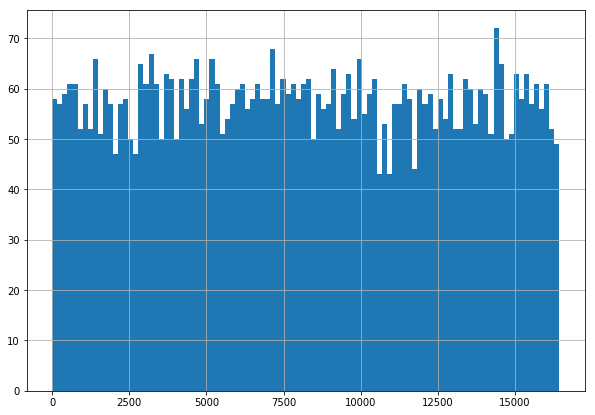

In [423]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

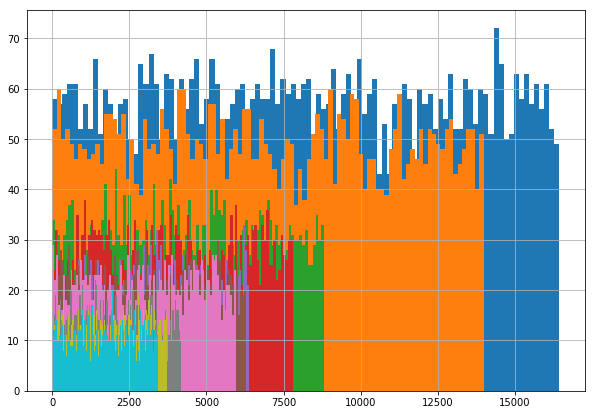

In [424]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

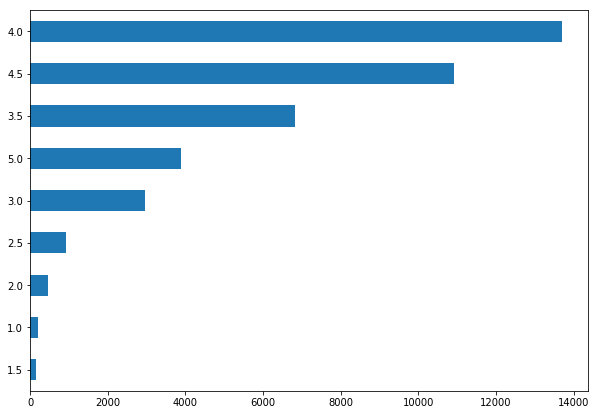

In [425]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

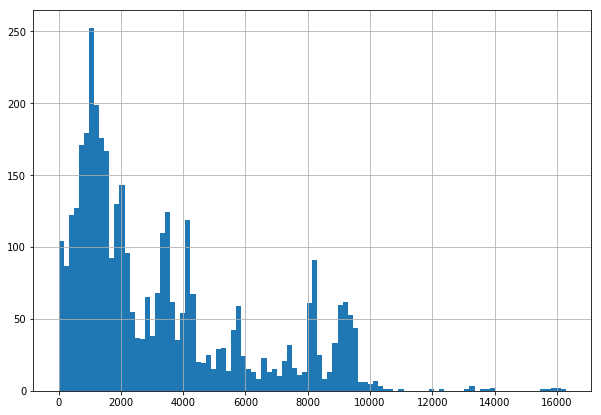

In [426]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

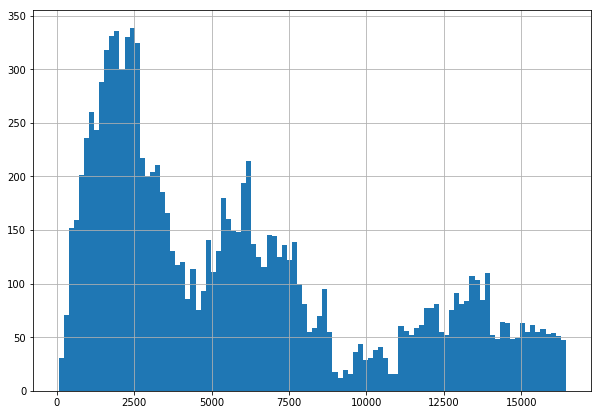

In [427]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

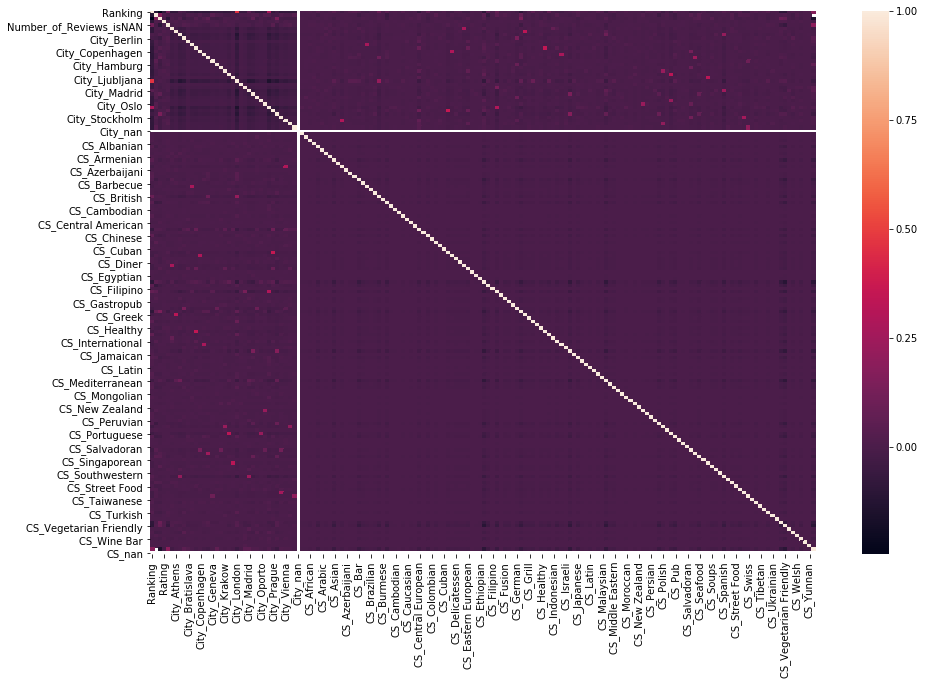

In [428]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [429]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [430]:
import datetime
from datetime import datetime, timedelta

In [483]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    #Справочник о городах
    city_info = {
        'Munich':
        {
            'capital': 0,
            'population': 1456000,
            'numberofrestaraunts': 3018,
            'country': 'Germany'
        },
        'Oporto':
        {
            'capital': 0,
            'population': 214000,
            'numberofrestaraunts': 1902,
            'country': 'Portugal'
        },
        'Milan':
        {
            'capital': 0,
            'population': 1352000,
            'numberofrestaraunts': 7000,
            'country': 'Italy'
        },
        'Barcelona':
        {
            'capital': 0,
            'population': 5515000,
            'numberofrestaraunts': 9309,
            'country': 'Spain'
        },
        'Zurich':
        {
            'capital': 0,
            'population': 402000,
            'numberofrestaraunts': 1792,
            'country': 'Switzerland'
        },
        'Lyon':
        {
            'capital': 0,
            'population': 513000,
            'numberofrestaraunts': 2701,
            'country': 'France'
        },
        'Hamburg':
        {
            'capital': 0,
            'population': 1822000,
            'numberofrestaraunts': 3138,
            'country': 'Germany'
        },
        'Geneva':
        {
            'capital': 0,
            'population': 495000,
            'numberofrestaraunts': 1665,
            'country': 'Switzerland'
        },
        'Krakow':
        {
            'capital': 0,
            'population': 769000,
            'numberofrestaraunts': 1621,
            'country': 'Poland'
        },
        'Paris':
        {
            'capital': 1,
            'population': 2148000,
            'numberofrestaraunts': 16684,
            'country': 'France'
        },
        'Stockholm':
        {
            'capital': 1,
            'population': 974000,
            'numberofrestaraunts': 2882,
            'country': 'Sweden'
        },
        'London':
        {
            'capital': 1,
            'population': 8899000,
            'numberofrestaraunts': 19374,
            'country': 'England'
        },
        'Berlin':
        {
            'capital': 1,
            'population': 3748000,
            'numberofrestaraunts': 6962,
            'country': 'Germany'
        },
        'Bratislava':
        {
            'capital': 1,
            'population': 424000,
            'numberofrestaraunts': 1201,
            'country': 'Slovakia'
        },
        'Vienna':
        {
            'capital': 1,
            'population': 1889000,
            'numberofrestaraunts': 3951,
            'country': 'Austria'
        },
        'Rome':
        {
            'capital': 1,
            'population': 2873000,
            'numberofrestaraunts': 10558,
            'country': 'Italy'
        },
        'Madrid':
        {
            'capital': 1,
            'population': 6549000,
            'numberofrestaraunts': 10891,
            'country': 'Spain'
        },
        'Dublin':
        {
            'capital': 1,
            'population': 1361000,
            'numberofrestaraunts': 2298,
            'country': 'Ireland'
        },
        'Brussels':
        {
            'capital': 1,
            'population': 1831000,
            'numberofrestaraunts': 3525,
            'country': 'Belgium'
        },
        'Warsaw':
        {
            'capital': 1,
            'population': 1708000,
            'numberofrestaraunts': 3040,
            'country': 'Poland'
        },
        'Budapest':
        {
            'capital': 1,
            'population': 1750000,
            'numberofrestaraunts': 2917,
            'country': 'Hungary'
        },
        'Copenhagen':
        {
            'capital': 1,
            'population': 602000,
            'numberofrestaraunts': 2329,
            'country': 'Denmark'
        },
        'Amsterdam':
        {
            'capital': 1,
            'population': 821000,
            'numberofrestaraunts': 3847,
            'country': 'The Netherlands'
        },
        'Lisbon':
        {
            'capital': 1,
            'population': 504000,
            'numberofrestaraunts': 4682,
            'country': 'Portugal',
        },
        'Prague':
        {
            'capital': 1,
            'population': 1319000,
            'numberofrestaraunts': 5213,
            'country': 'The Czech Republic'
        },
        'Oslo':
        {
            'capital': 1,
            'population': 673000,
            'numberofrestaraunts': 1303,
            'country': 'Norway'
        },
        'Helsinki':
        {
            'capital': 1,
            'population': 631000,
            'numberofrestaraunts': 1478,
            'country': 'Finland'
        },
        'Edinburgh':
        {
            'capital': 1,
            'population': 488000,
            'numberofrestaraunts': 1852,
            'country': 'Scotland'
        },
        'Ljubljana':
        {
            'capital': 1,
            'population': 284000,
            'numberofrestaraunts': 583,
            'country': 'Slovenia'
        },
        'Athens':
        {
            'capital': 1,
            'population': 664000,
            'numberofrestaraunts': 2441,
            'country': 'Greece'
        },
        'Luxembourg':
        {
            'capital': 1,
            'population': 115000,
            'numberofrestaraunts': 716,
            'country': 'Luxembourg'
        }
    }
    
    # Столица - не столица
    df_output['Capital'] = df_output['City'].apply(lambda x: city_info[x]['capital'])
    df_output['Not_capital'] = df_output['Capital'].apply(lambda x: 1 if x == 0 else 0)
    
    # Название страны
    df_output['Country_name'] = df_output['City'].apply(lambda x: city_info[x]['country'])
    df_countries = pd.get_dummies(df_output['Country_name'], drop_first='True')
    
    # Население города
    df_output['Population'] = df_output['City'].apply(lambda x: city_info[x]['population'])
    
    # Количество ресторанов
    df_output['num_restaurants'] = df_output['City'].apply(lambda x: city_info[x]['numberofrestaraunts'])
    
    # Индекс отношения количества ресторанов на душу населения
    df_output['restaraunts_per_people'] = df_output['City'].apply(lambda x: (city_info[x]['numberofrestaraunts'] / city_info[x]['population']))
    
    # Относительный рейтинг по городу
    df_output['ranking_per_city'] = df_output['Ranking'] / df_output['num_restaurants']
    
    # Индекс отношения населения на количество ресторанов
    df_output['people_per_restaraunts'] = df_output['City'].apply(lambda x: (city_info[x]['population'] / city_info[x]['numberofrestaraunts']))
    
    # Сетевой ресторан или нет
    df_output.columns
    df_output.tail()
    df_output['id'] = df_output['Restaurant_id'].apply(lambda x: int(x[3:]))
    id_restaurants = pd.Series(df_output['id'].value_counts())
    chain_restaurants = id_restaurants[id_restaurants > 1]
    df_output['chain_restaurants'] = df_output['id'].apply(lambda x: 1 if x in chain_restaurants else 0)
    df_output['not_chain_restaurants'] = df_output['chain_restaurants'].apply(lambda x: 1 if x == 0 else 0)
    
   
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    df_output['Price Range'].fillna('0', inplace=True)
    
     # для нулевых значений поставим средние значения по городу
    number_of_reviews_mean = df_output.groupby('City')['Number of Reviews'].mean()
    df_output['Number of Reviews'] = df_output.apply(lambda row: number_of_reviews_mean[row['City']] if row['Number of Reviews'] == 0 else row['Number of Reviews'], axis=1)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    price_range_dict = dict(zip(['$$ - $$$', '$', '$$$$', '0'], [500, 5, 5000, 0]))
    df_output['Price Range'] = df_output['Price Range'].replace(to_replace=price_range_dict)

    # df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: re.findall(r"[^'][\w\s]+[^']", str(x)))

    # Обработка пропусков
    df_output['Cuisine_Style_isNAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    # подсчитываю количество типов кухонь, если не заполнено, пишу 2(медиана)
    df_output['Cuisine_Count']=df_output['Cuisine Style'].apply(lambda x: 2 if type(x)==float else len(x.split(',')))
    
    # Вынесем в отдельные колонки признак наличия трех топовых типов кухонь
    def cu1(rec):
        if type(rec)==float:
            return 0
        elif 'Vegetarian Friendly' in rec:
            return 1
        else:
            return 0
    df_output['Veget']=df_output['Cuisine Style'].apply(cu1)
    def cu2(rec):
        if type(rec)==float:
            return 0
        elif 'European' in rec:
            return 1
        else:
            return 0
    df_output['Eur']=df_output['Cuisine Style'].apply(cu2)
    def cu3(rec):
        if type(rec)==float:
            return 0
        elif 'Mediterranean' in rec:
            return 1
        else:
            return 0
    df_output['Med']=df_output['Cuisine Style'].apply(cu3)
    def cu4(rec):
        if type(rec)==float:
            return 0
        elif 'Vegetarian Friendly' in rec or 'European' in rec or 'Mediterranean'in rec:
            return 0
        else:
            return 1
    df_output['Oth']=df_output['Cuisine Style'].apply(cu4)
    
    # Уберем ненужные для модели признаки
    df_output = df_output.drop(['Cuisine Style'], axis = 1)
    

    
   
    
    #df_output = pd.concat([df_output, pd.get_dummies(df_output.explode('Cuisine Style')['Cuisine Style'], dummy_na=True)], axis = 1)
    #df_output = pd.get_dummies(data.explode('Cuisine Style'), columns=['Cuisine Style'], dummy_na=True)
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # поработаем с датами
    df_output['reviews_data'] = df_output['Reviews'].apply(lambda x: re.findall(r"\d\d\/\d\d\/\d{4}", str(x)) 
                                                           if len(re.findall(r"\d\d\/\d\d\/\d{4}", str(x))) == 2
                                                           else ['01/01/2000', '01/01/2000'])
    
    # количество минут между послденим и предпоследним отзывом
    df_output['reviews_delta'] = df_output['reviews_data'].apply(lambda x: (datetime.timestamp(datetime.strptime(x[0], '%m/%d/%Y')) 
                                                                    - datetime.timestamp(datetime.strptime(x[1], '%m/%d/%Y')))/60 )

       
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [484]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Capital,Not_capital,Population,num_restaurants,restaraunts_per_people,...,City_Warsaw,City_Zurich,City_nan,Cuisine_Style_isNAN,Cuisine_Count,Veget,Eur,Med,Oth,reviews_delta
1270,9066.0,0,129.816488,0,0.0,1,0,8899000,19374,0.002177,...,0,0,0,1,2,0,0,0,0,0.0
18245,815.0,0,6.000000,1,4.5,0,1,214000,1902,0.008888,...,0,0,0,1,2,0,0,0,0,0.0
21306,2752.0,500,365.000000,1,3.5,1,0,2873000,10558,0.003675,...,0,0,0,0,4,1,0,0,0,0.0
28347,3126.0,0,10.000000,1,3.0,1,0,821000,3847,0.004686,...,0,0,0,1,2,0,0,0,0,357120.0
36889,242.0,500,219.000000,1,4.0,0,1,1822000,3138,0.001722,...,0,0,0,0,3,0,1,0,0,44640.0
25475,2549.0,500,20.000000,1,3.5,1,0,1319000,5213,0.003952,...,0,0,0,0,3,0,0,0,1,-84960.0
34198,137.0,500,1538.000000,1,4.5,1,0,488000,1852,0.003795,...,0,0,0,0,6,1,0,0,0,2880.0
10060,8764.0,0,4.000000,1,4.5,1,0,8899000,19374,0.002177,...,0,0,0,1,2,0,0,0,0,126720.0
18031,1567.0,5,110.000000,1,4.5,1,0,2873000,10558,0.003675,...,0,0,0,0,3,0,0,1,0,99360.0
30269,895.0,5,130.000000,1,3.5,1,0,664000,2441,0.003676,...,0,0,0,0,2,0,0,0,1,87840.0


In [485]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Capital                    50000 non-null int64
Not_capital                50000 non-null int64
Population                 50000 non-null int64
num_restaurants            50000 non-null int64
restaraunts_per_people     50000 non-null float64
ranking_per_city           50000 non-null float64
people_per_restaraunts     50000 non-null float64
id                         50000 non-null int64
chain_restaurants          50000 non-null int64
not_chain_restaurants      50000 non-null int64
num to average cuisines    50000 non-null float64
index_popular_cuisines     50000 non-null float64
City_Amsterdam             50000 non-null uint8
City_Athens

In [486]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [487]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [488]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 55), (40000, 55), (40000, 54), (32000, 54), (8000, 54))

# Model 
Сам ML

In [489]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [490]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [491]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [492]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.206186875


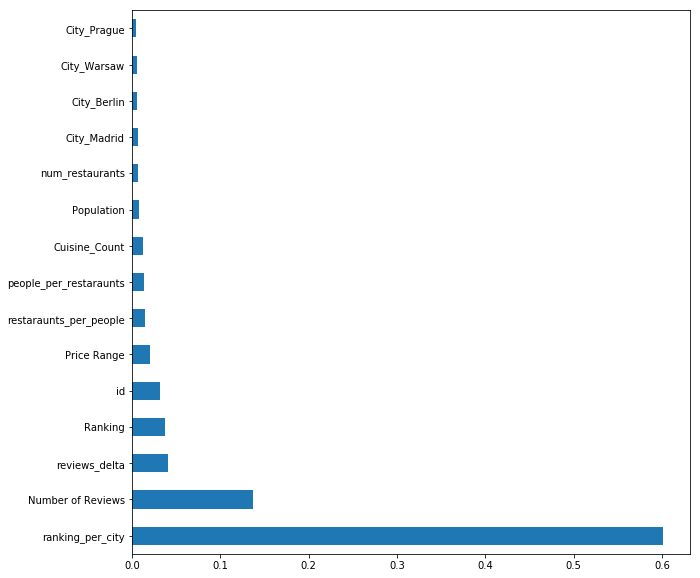

In [441]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [442]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Capital,Not_capital,Population,num_restaurants,restaraunts_per_people,ranking_per_city,...,City_Warsaw,City_Zurich,City_nan,Cuisine_Style_isNAN,Cuisine_Count,Veget,Eur,Med,Oth,reviews_delta
1280,928.0,500,281.0,0.0,0,1,5515000,9309,0.001688,0.099688,...,0,0,0,0,4,1,1,1,0,249120.0
1490,505.0,500,207.0,0.0,1,0,3748000,6962,0.001858,0.072537,...,0,0,0,0,4,1,0,0,0,44640.0
1034,4584.0,5,49.0,0.0,1,0,2873000,10558,0.003675,0.434173,...,0,0,0,0,1,0,0,0,1,0.0
2287,6080.0,0,5.0,0.0,1,0,6549000,10891,0.001663,0.558259,...,0,0,0,1,2,0,0,0,0,0.0
3756,4745.0,500,30.0,0.0,1,0,2148000,16684,0.007767,0.284404,...,0,0,0,0,1,0,0,0,1,823680.0
2143,11467.0,0,3.0,0.0,1,0,8899000,19374,0.002177,0.591876,...,0,0,0,1,2,0,0,0,0,450720.0
4942,130.0,500,98.0,0.0,0,1,495000,1665,0.003364,0.078078,...,0,0,0,0,3,1,1,0,0,74880.0
6427,6419.0,500,63.0,0.0,0,1,5515000,9309,0.001688,0.689548,...,0,0,0,0,3,0,1,1,0,-135360.0
6370,11773.0,500,47.0,0.0,1,0,8899000,19374,0.002177,0.607670,...,0,0,0,0,4,0,0,0,1,64800.0
7189,174.0,500,888.0,0.0,0,1,1352000,7000,0.005178,0.024857,...,0,0,0,0,4,1,0,1,0,41760.0


In [443]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 53 columns):
Ranking                   10000 non-null float64
Price Range               10000 non-null int64
Number of Reviews         10000 non-null float64
Rating                    10000 non-null float64
Capital                   10000 non-null int64
Not_capital               10000 non-null int64
Population                10000 non-null int64
num_restaurants           10000 non-null int64
restaraunts_per_people    10000 non-null float64
ranking_per_city          10000 non-null float64
people_per_restaraunts    10000 non-null float64
id                        10000 non-null int64
chain_restaurants         10000 non-null int64
not_chain_restaurants     10000 non-null int64
City_Amsterdam            10000 non-null uint8
City_Athens               10000 non-null uint8
City_Barcelona            10000 non-null uint8
City_Berlin               10000 non-null uint8
City_Bratislava           10000 no

In [444]:
test_data = test_data.drop(['Rating'], axis=1)

In [445]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [446]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [447]:
# приведем к кратности шага 0.5
predict_submission = list(map(lambda x: round(x * 2)/2, predict_submission))

In [448]:
# посмотрим на результат
len(predict_submission), predict_submission[:10]

(10000, [3.5, 4.0, 4.5, 4.5, 4.5, 4.5, 2.0, 3.0, 4.0, 4.5])

In [449]:
len(predict_submission)

10000

In [450]:
len(sample_submission)

10000

In [451]:
predict_submission

[3.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 2.0,
 3.0,
 4.0,
 4.5,
 4.5,
 3.5,
 4.0,
 4.0,
 3.5,
 3.0,
 3.5,
 4.0,
 2.5,
 4.0,
 4.0,
 4.5,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 4.0,
 3.5,
 4.0,
 5.0,
 3.5,
 3.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.0,
 5.0,
 4.5,
 3.0,
 4.0,
 3.0,
 4.0,
 3.0,
 4.0,
 4.0,
 5.0,
 3.5,
 4.0,
 4.5,
 4.0,
 5.0,
 4.5,
 3.5,
 3.5,
 4.0,
 4.0,
 4.0,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.0,
 4.5,
 4.5,
 4.0,
 4.0,
 3.0,
 4.5,
 4.0,
 4.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 4.5,
 5.0,
 4.0,
 3.0,
 4.0,
 3.5,
 4.0,
 5.0,
 4.5,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 3.0,
 3.5,
 4.0,
 3.5,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.5,
 4.5,
 4.0,
 3.5,
 5.0,
 3.5,
 4.5,
 3.5,
 4.0,
 3.5,
 5.0,
 4.0,
 4.5,
 4.0,
 4.0,
 3.5,
 3.5,
 3.0,
 4.5,
 4.0,
 3.0,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.5,
 5.0,
 4.0,
 5.0,
 4.5,
 4.0,
 3.5,
 4.5,
 3.5,
 3.5,
 4.0,
 4.0,
 4.5,
 4.0,
 4.5,
 2.0,
 4.5,
 4.5,
 4.5,
 3.5,
 3.5,
 4.0,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 4.5,
 3.5

In [452]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head()

,Restaurant_id,Rating
0,id_0,3.5
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!


---
Мой профиль на [github](https://github.com/luhakv)  
Мой профиль на [kaggle](https://www.kaggle.com/luhakv)  
Мой профиль на [LinkedIn](https://www.linkedin.com/in/luhakv)